# 算法介绍
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6c1f1x87mj210p0u0dir.jpg)
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6c1ehgu53j21pi0ckjtx.jpg)
决策树的优点是直观易于理解，因此应该将其进行可视化


# 导入依赖库

In [1]:
import numpy as np
import regTrees

# ID3
* 第3章使用决策树来进行分类。决策树不断将数据切分成小数据集,直到所有目标变量完全相同,或者数据不能再切分为止。决策树是一种贪心算法,它要在给定时间内做出最佳选择,但并不关心能否达到全局最优
* 本章使用的算法称为ID3,它是一个好的算法但并不完美。ID3算法无法直接处理数值型数据,尽管我们可以通过量化的方法将数值型数据转化为标称型数值,但是如果存在太多的特征划分,ID3算法仍然会面临其他问题。
* ID3的做法是每次选取当前最佳的特征来分割数据,并按照该特征的所有可能取值来切分。也就是说,如果一个特征有4种取值,那么数据将被切成4份。一旦按某特征切分后, 该特征在之后的算法执行过程中将不会再起作用, 所以有观点认为这种切分方式过于迅速。另外一种方法是二元切分法,即每次把数据集切成两份。如果数据的某特征值等于切分所要求的值,那么这些数据就进入树的左子树,反之则进入树的右子树

## 算法实现

In [2]:
def create_dataset():
    dataset = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no']
    ]
    labels = ['no surfacing', 'flippers']
    return dataset, labels

In [3]:
my_dataset, my_labels = create_dataset()

In [4]:
def calc_shannon_entropy(dataset):
    """calculate shannon entropy"""
    number_entries = len(dataset)
    label_count = {}
    shannon_entropy = 0
    for feature_vec in dataset:
        current_label = feature_vec[-1]
        if current_label not in label_count.keys():
            label_count[current_label] = 0
        label_count[current_label] += 1
    for key in label_count.keys():
        probability = label_count[key] / number_entries
        shannon_entropy -= probability * np.log2(probability)
    return shannon_entropy

In [5]:
calc_shannon_entropy(my_dataset)

0.9709505944546686

In [6]:
# 增加分类，观察熵的变化
my_dataset[0][-1] = 'maybe'
calc_shannon_entropy(my_dataset)

1.3709505944546687

数据中分类越多，越混乱，熵也越大
* 如果数据中只有一个分类，那么熵为0
* 现在的数据中有两个分类，分别是yes(2个)，no(3个)，熵为0.9709505944546686
* 增加分类到三个，发现熵也随着增加

In [7]:
def split_dataset(dataset, axis, value):
    """split dataset based on feature"""
    return_dataset = list()
    for feature_vec in dataset:
        if feature_vec[axis] == value:
            reduced_feature = feature_vec[:axis]
            reduced_feature.extend(feature_vec[axis + 1:])
            return_dataset.append(reduced_feature)
    return return_dataset

In [8]:
my_dataset, my_labels = create_dataset()
my_dataset

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [9]:
# 根据第一个特征值为1的进行划分
split_dataset(my_dataset, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [10]:
split_dataset(my_dataset, 0, 0)

[[1, 'no'], [1, 'no']]

In [11]:
def choose_best_feature_to_split(dataset):
    """choose best feature to split based on information gain"""
    number_of_features = len(dataset[0]) - 1
    base_entropy = calc_shannon_entropy(dataset)
    best_information_gain = 0.0
    best_feature_index = -1
    for i in range(number_of_features):
        feature_list = [entry[i] for entry in dataset]
        unique_values = set(feature_list)
        new_entropy = 0
        for value in unique_values:
            sub_dataset = split_dataset(dataset, i, value)
            probability = len(sub_dataset) / len(dataset)
            new_entropy = probability * calc_shannon_entropy(sub_dataset)
        information_gain = base_entropy - new_entropy
        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature_index = i
    return best_feature_index



In [12]:
my_dataset

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [13]:
choose_best_feature_to_split(my_dataset)

0

通过对比数据集划分前后熵的减少来找最优特征，使得熵减少最大的就是最佳特征

In [14]:
def majority_vote(class_list):
    class_count = {}
    for vote in class_list:
        if vote not in class_count.keys():
            class_count[vote] = 0
        class_count[vote] += 1
    sorted_class_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
    return sorted_class_count[0][0]

In [15]:
def create_tree(dataset, labels):
    labels_copy = labels.copy()
    class_list = [example[-1] for example in dataset]
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if len(dataset[0]) == 1:
        return majority_vote(class_list)
    best_feature = choose_best_feature_to_split(dataset)
    best_feature_label = labels_copy[best_feature]
    my_tree = {best_feature_label: {}}
    del (labels_copy[best_feature])
    feature_values = [example[best_feature] for example in dataset]
    unique_values = set(feature_values)
    for value in unique_values:
        sub_labels = labels_copy.copy()
        my_tree[best_feature_label][value] = create_tree(split_dataset(dataset, best_feature, value), sub_labels)
    return my_tree


In [16]:
my_dataset, my_labels = create_dataset()
create_tree(my_dataset, my_labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 算法测试
使用决策树进行分类

In [17]:
def classify(tree, labels, test_vec):
    first_str = list(tree.keys())[0]
    second_dict = tree[first_str]
    feature_index = labels.index(first_str)
    for key in second_dict.keys():
        if test_vec[feature_index] == key:
            if type(second_dict[key]).__name__ == 'dict':
                class_label = classify(second_dict[key], labels, test_vec)
            else:
                class_label = second_dict[key]
    return class_label

In [18]:
my_dataset, my_labels = create_dataset()
my_tree = create_tree(my_dataset, my_labels)

In [19]:
classify(my_tree, my_labels, [1, 0])

'no'

In [20]:
classify(my_tree, my_labels, [1, 1])


'yes'

## 存储树模型

In [21]:
import pickle

In [22]:
def save_tree(tree, file):
    file = open(file, 'wb')
    pickle.dump(tree, file)
    file.close()

In [23]:
def grab_tree(filename):
    file = open(filename, 'rb')
    return pickle.load(file)

In [24]:
save_tree(my_tree, './classifierStorage.txt')

In [25]:
grab_tree('./classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 树模型可视化

In [26]:
import treePlotter

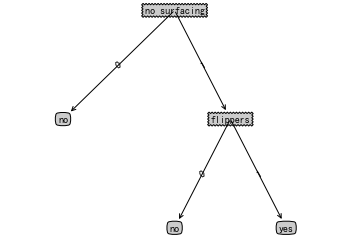

In [27]:
treePlotter.createPlot(my_tree)

## 使用决策树预测隐形眼睛类型

In [28]:
fr = open('./lenses.txt')
lenses = [instance.strip().split("\t") for instance in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lenses_tree = create_tree(lenses, lensesLabels)

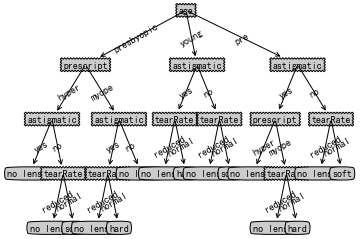

In [29]:
treePlotter.createPlot(lenses_tree)

所示的决策树非常好地匹配了实验数据,然而这些匹配选项可能太多了。我们将这种问题称之为过度匹配(overfitting) 。为了减少过度匹配问题,我们可以裁剪决策树,去掉一些不必要的叶子节点。如果叶子节点只能增加少许信息,则可以删除该节点,将它并入到其他叶子节点中

# CART(分类回归树)

In [30]:
def load_dataset(file):
    data_matrix = []
    f = open(file)
    lines = f.readlines()
    for line in lines:
        current_line = line.strip().split("\t")
        float_line = list(map(float, current_line))
        data_matrix.append(float_line)
    return data_matrix

In [31]:
def bin_split_dataset(dataset, feature, value):
    matrix_0 = dataset[np.nonzero(dataset[:, feature] > value)[0], :]
    matrix_1 = dataset[np.nonzero(dataset[:, feature] <= value)[0], :]
    return matrix_0, matrix_1

In [32]:
def regression_error(dataset):
    """calculate total square error"""
    return np.var(dataset[:, -1]) * np.shape(dataset)[0]

In [33]:
def regression_leaf(dataset):
    return np.mean(dataset[:, -1])

In [34]:
def choose_best_split(dataset, leaf_type=regression_leaf, error_type=regression_error, ops=(1, 4)):
    if len(set(dataset[:, -1].T.tolist()[0])) == 1:
        return None, leaf_type(dataset)
    tolerate_e = ops[0]
    tolerate_n = ops[1]
    square_error = error_type(dataset)
    best_square_error = np.inf
    best_index, best_value = 0, 0
    m, n = np.shape(dataset)
    for feature_index in range(n - 1):
        for split_value in set(dataset[:, feature_index].flatten().tolist()[0]):
            matrix_0, matrix_1 = bin_split_dataset(dataset, feature_index, split_value)
            other_matrix_0, other_matrix_1 = regTrees.binSplitDataSet(dataset, feature_index, split_value)
            if matrix_0.shape[0] < tolerate_n or matrix_1.shape[0] < tolerate_n:
                continue
            new_square_error = error_type(matrix_0) + error_type(matrix_1)
            if new_square_error < best_square_error:
                best_square_error = new_square_error
                best_index = feature_index
                best_value = split_value
    if square_error - best_square_error < tolerate_e:
        return None, leaf_type(dataset)
    matrix_0, matrix_1 = bin_split_dataset(dataset, best_index, best_value)
    if matrix_0.shape[0] < tolerate_n or matrix_1.shape[0] < tolerate_n:
        return None, leaf_type(dataset)
    return best_index, best_value




In [35]:
def create_tree(dataset, leaf_type=regression_leaf, error_type=regression_error, ops=(1, 4)):
    feature, value = choose_best_split(dataset, leaf_type, error_type, ops)
    if feature is None:
        return value
    return_tree = {'splitIndex': feature, 'splitValue': value}
    left_set, right_set = bin_split_dataset(dataset, feature, value)
    return_tree['left'] = create_tree(left_set, leaf_type, error_type, ops)
    return_tree['right'] = create_tree(right_set, leaf_type, error_type, ops)
    return return_tree


In [36]:
my_dataset = np.mat(load_dataset('./ex00.txt'))

In [37]:
create_tree(my_dataset)

{'splitIndex': 0,
 'splitValue': 0.48813,
 'left': 1.0180967672413792,
 'right': -0.04465028571428572}

In [38]:
my_dataset1 = np.mat(load_dataset('./ex0.txt'))
create_tree(my_dataset1)

{'splitIndex': 1,
 'splitValue': 0.39435,
 'left': {'splitIndex': 1,
  'splitValue': 0.582002,
  'left': {'splitIndex': 1,
   'splitValue': 0.797583,
   'left': 3.9871632,
   'right': 2.9836209534883724},
  'right': 1.980035071428571},
 'right': {'splitIndex': 1,
  'splitValue': 0.197834,
  'left': 1.0289583666666666,
  'right': -0.023838155555555553}}

In [39]:
test_mat = np.mat(np.eye(4))

In [40]:
mat_0, mat_1 = bin_split_dataset(test_mat, 1, 0.5)

## 预剪枝(prepruning)
通过控制ops参数来达到提前终止; 参数的设定非常关键，因为他会影响到节点的数量。然而,通过不断修改停止条件来得到合理结果并不是很好的办法。事实上,我们常常甚至不确定到底需要寻找什么样的结果

In [41]:
create_tree(my_dataset, ops=(0, 1))

{'splitIndex': 0,
 'splitValue': 0.48813,
 'left': {'splitIndex': 0,
  'splitValue': 0.620599,
  'left': {'splitIndex': 0,
   'splitValue': 0.625336,
   'left': {'splitIndex': 0,
    'splitValue': 0.625791,
    'left': {'splitIndex': 0,
     'splitValue': 0.643601,
     'left': {'splitIndex': 0,
      'splitValue': 0.651376,
      'left': {'splitIndex': 0,
       'splitValue': 0.6632,
       'left': {'splitIndex': 0,
        'splitValue': 0.683921,
        'left': {'splitIndex': 0,
         'splitValue': 0.819823,
         'left': {'splitIndex': 0,
          'splitValue': 0.837522,
          'left': {'splitIndex': 0,
           'splitValue': 0.846455,
           'left': {'splitIndex': 0,
            'splitValue': 0.919384,
            'left': {'splitIndex': 0,
             'splitValue': 0.976414,
             'left': {'splitIndex': 0,
              'splitValue': 0.985425,
              'left': {'splitIndex': 0,
               'splitValue': 0.989888,
               'left': {'splitIndex'

In [42]:
create_tree(my_dataset, ops=(1, 4))


{'splitIndex': 0,
 'splitValue': 0.48813,
 'left': 1.0180967672413792,
 'right': -0.04465028571428572}

ops参数的设置会影响到节点数量

## 后剪枝(postpruning)

In [43]:
def is_tree(obj):
    return type(obj).__name__ == 'dict'

In [44]:
def get_mean(tree):
    if is_tree(tree['left']):
        tree['left'] = get_mean(tree['left'])
    if is_tree(tree['right']):
        tree['right'] = get_mean(tree['right'])
    return (tree['left'] + tree['right']) / 2.0

In [45]:
def prune(tree, test_data):
    if test_data.shape[0] == 0:
        return get_mean(tree)
    if is_tree(tree['left']) or is_tree(tree['right']):
        left_set, right_set = bin_split_dataset(test_data, tree['splitIndex'], tree['splitValue'])
    if is_tree(tree['left']):
        tree['left'] = prune(tree['left'], left_set)
    if is_tree(tree['right']):
        tree['right'] = prune(tree['right'], right_set)
    if not is_tree(tree['left']) and not is_tree(tree['right']):
        left_set, right_set = bin_split_dataset(test_data, tree['splitIndex'], tree['splitValue'])
        error_no_merge = np.sum(np.power(left_set[:, -1] - tree['left'], 2)) + np.sum(
            np.power(right_set[:, -1] - tree['right'], 2))
        tree_mean = (tree['left'] + tree['right']) / 2
        error_merge = np.sum(np.power(test_data[:, -1] - tree_mean, 2))
        if error_merge < error_no_merge:
            print("merging")
            return tree_mean
        else:
            return tree
    else:
        return tree


# 模型树

In [46]:
def linear_solve(dataset):
    m, n = np.shape(dataset)
    X, y, = np.mat(np.ones((m, n))), np.mat(np.ones((m, 1)))
    X[:, 1:n] = dataset[:, 0:n - 1]
    y = dataset[:, -1]
    XTX = X.T * X
    if np.linalg.det(XTX) == 0.0:
        print(X)
        print(dataset)
        raise NameError("The matrix is singular")
    ws = (XTX.I) * (X.T * y)
    return ws, X, y

In [47]:
def model_leaf(dataset):
    ws, X, y = linear_solve(dataset)
    return ws

In [48]:
def model_error(dataset):
    ws, X, y = linear_solve(dataset)
    y_predict = X * ws
    return np.sum(np.power(y_predict - y, 2))

In [49]:
my_dataset = np.mat(load_dataset('exp2.txt'))

In [50]:
my_tree = create_tree(my_dataset, model_leaf,model_error)

In [51]:
my_tree

{'splitIndex': 0,
 'splitValue': 0.285477,
 'left': matrix([[1.69855694e-03],
         [1.19647739e+01]]),
 'right': matrix([[3.46877936],
         [1.18521743]])}

# 模型树与标准回归的比较

In [52]:
def regression_tree_eval(model,input_matrix):
    return float(model)

In [54]:
def model_tree_eval(model,input_matrix):
    n = input_matrix.shape[1]
    X = np.ones((1,n+1))
    X[:,1:n+1] = input_matrix
    return float(X*model)


In [75]:
def tree_forecast(tree,input_matrix,model_evaluation=regression_tree_eval):
    if not is_tree(tree):
        return model_evaluation(tree,input_matrix)
    if input_matrix[tree['splitIndex']] > tree['splitValue']:
        if is_tree(tree['left']):
            return tree_forecast(tree['left'],input_matrix,model_evaluation)
        else:
            return model_evaluation(tree['left'],input_matrix)
    else:
        if is_tree(tree['right']):
            return tree_forecast(tree['right'],input_matrix,model_evaluation)
        else:
            return model_evaluation(tree['right'],input_matrix)

In [76]:
def create_forecast(tree,input_matrix,model_evaluation=regression_tree_eval):
    m = len(input_matrix)
    y_predicted = np.mat(np.zeros((m,1)))
    for i in range(m):
        y_predicted[i,0] = tree_forecast(tree,np.mat(input_matrix[i]),model_evaluation)
    return y_predicted


In [77]:
train_mat = np.mat(load_dataset('./bikeSpeedVsIq_train.txt'))
test_mat = np.mat(load_dataset('./bikeSpeedVsIq_test.txt'))

In [78]:
my_tree =create_tree(train_mat,ops=(1,20))
y_predict = create_forecast(my_tree,test_mat[:,0])
np.corrcoef(y_predict,test_mat[:,1],rowvar=0)[0,1]

0.9640852318222141

In [79]:
my_tree = create_tree(train_mat,model_leaf,model_error,ops=(1,20))
y_predict = create_forecast(my_tree,test_mat[:,0],model_tree_eval)
np.corrcoef(y_predict,test_mat[:,1],rowvar=0)[0,1]

0.9760412191380623

模型树的效果要好于回归树